# EJEMPLO DE CLASE
Se midio el porcentaje de supervivencia de cierto tipo de semen animal `y` despues de almacenarlo, con distintas combinaciones de concentraciones de 3 materiales `x1`, `x2` y `x3`, que se usan para incrementar la probabilidad de supervivencia. Los datos se  muestran en la tabla siguiente. Obtenga el modelo de regresion multiple





In [14]:
import numpy as np
import pandas as pd

# Data from the image
data = [
    [25.5, 1.74, 5.3, 10.80],
    [31.2, 6.32, 5.42, 9.40],
    [25.9, 6.22, 8.41, 7.20],
    [38.4, 10.52, 4.63, 8.50],
    [18.4, 1.19, 11.60, 9.40],
    [26.7, 1.22, 5.85, 9.90],
    [26.4, 4.10, 6.62, 8.00],
    [25.9, 6.32, 8.72, 9.10],
    [32.0, 4.08, 4.42, 8.70],
    [25.2, 4.15, 7.60, 9.20],
    [39.7, 10.15, 4.83, 9.40],
    [35.7, 1.72, 3.12, 7.60],
    [26.5, 1.70, 5.30, 8.20],
]

# Convert to NumPy array
numpy_array = np.array(data)

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=["Y", "X1", "X2", "X3"])

# Display results
print("NumPy Array:")
print(numpy_array)

print("\nPandas DataFrame:")
print(df)


NumPy Array:
[[25.5   1.74  5.3  10.8 ]
 [31.2   6.32  5.42  9.4 ]
 [25.9   6.22  8.41  7.2 ]
 [38.4  10.52  4.63  8.5 ]
 [18.4   1.19 11.6   9.4 ]
 [26.7   1.22  5.85  9.9 ]
 [26.4   4.1   6.62  8.  ]
 [25.9   6.32  8.72  9.1 ]
 [32.    4.08  4.42  8.7 ]
 [25.2   4.15  7.6   9.2 ]
 [39.7  10.15  4.83  9.4 ]
 [35.7   1.72  3.12  7.6 ]
 [26.5   1.7   5.3   8.2 ]]

Pandas DataFrame:
       Y     X1     X2    X3
0   25.5   1.74   5.30  10.8
1   31.2   6.32   5.42   9.4
2   25.9   6.22   8.41   7.2
3   38.4  10.52   4.63   8.5
4   18.4   1.19  11.60   9.4
5   26.7   1.22   5.85   9.9
6   26.4   4.10   6.62   8.0
7   25.9   6.32   8.72   9.1
8   32.0   4.08   4.42   8.7
9   25.2   4.15   7.60   9.2
10  39.7  10.15   4.83   9.4
11  35.7   1.72   3.12   7.6
12  26.5   1.70   5.30   8.2


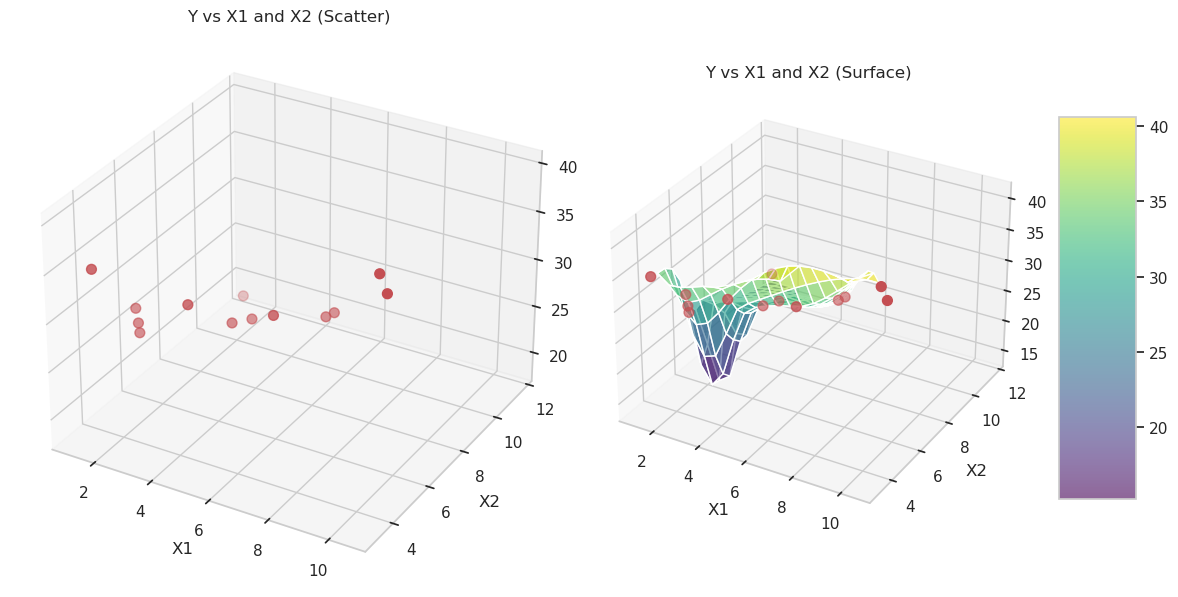

In [23]:
# Create a 3D plot

from scipy.interpolate import griddata
fig = plt.figure(figsize=(12, 8))

# --- Plot 1: 3D Scatter (Y vs X1, X2) ---
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df['X1'], df['X2'], df['Y'], c='r', marker='o', s=50)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
ax1.set_title('Y vs X1 and X2 (Scatter)')

# --- Plot 2: Surface Interpolation (Y vs X1, X2) ---
ax2 = fig.add_subplot(122, projection='3d')

# Create grid for surface
x1_grid = np.linspace(df['X1'].min(), df['X1'].max(), 20)
x2_grid = np.linspace(df['X2'].min(), df['X2'].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_grid, x2_grid)

# Interpolate Y values for the grid
y_grid = griddata(
    (df['X1'], df['X2']), df['Y'],
    (x1_mesh, x2_mesh),
    method='cubic'  # You can try 'linear' or 'nearest' if 'cubic' fails
)

# Plot surface
surf = ax2.plot_surface(x1_mesh, x2_mesh, y_grid, cmap='viridis', alpha=0.6)
ax2.scatter(df['X1'], df['X2'], df['Y'], c='r', marker='o', s=50, label='Data Points')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Y')
ax2.set_title('Y vs X1 and X2 (Surface)')
fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[["X1", "X2", "X3"]]  # Independent variables
y = df["Y"]  

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)


# Get R² using model.score() (same as r2_score(y_true, y_pred))
r_squared = model.score(X, y)
print(f"R² (coefficient of determination): {r_squared:.4f}")



Coefficients: [ 1.01610044 -1.8616492  -0.34326049]
Intercept: 39.15734995497773
Predictions: [27.35141063 32.26231743 27.34954936 38.3095766  15.5447301  26.10806578
 28.2531601  26.22185321 32.08818399 26.06763631 37.25235515 32.48791746
 28.20324389]
R² (coefficient of determination): 0.9117


In [21]:
df["predictions"] = predictions
df

,Y,X1,X2,X3,predictions
0,25.5,1.74,5.30,10.8,27.351411
1,31.2,6.32,5.42,9.4,32.262317
2,25.9,6.22,8.41,7.2,27.349549
3,38.4,10.52,4.63,8.5,38.309577
4,18.4,1.19,11.60,9.4,15.544730
5,26.7,1.22,5.85,9.9,26.108066
6,26.4,4.10,6.62,8.0,28.253160
7,25.9,6.32,8.72,9.1,26.221853
8,32.0,4.08,4.42,8.7,32.088184
9,25.2,4.15,7.60,9.2,26.067636


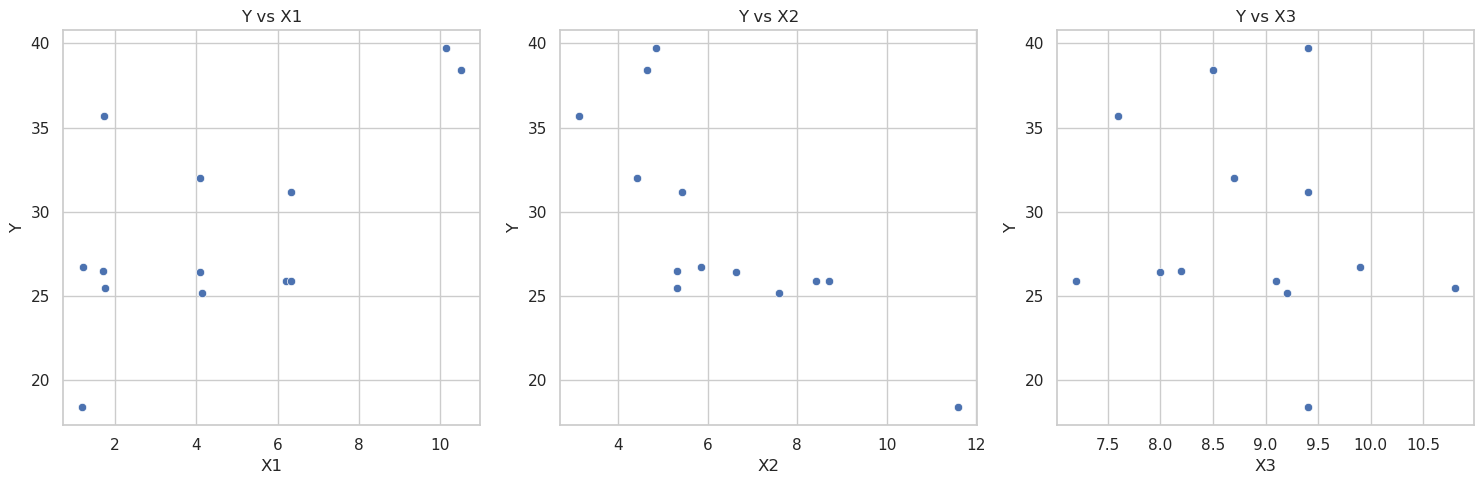

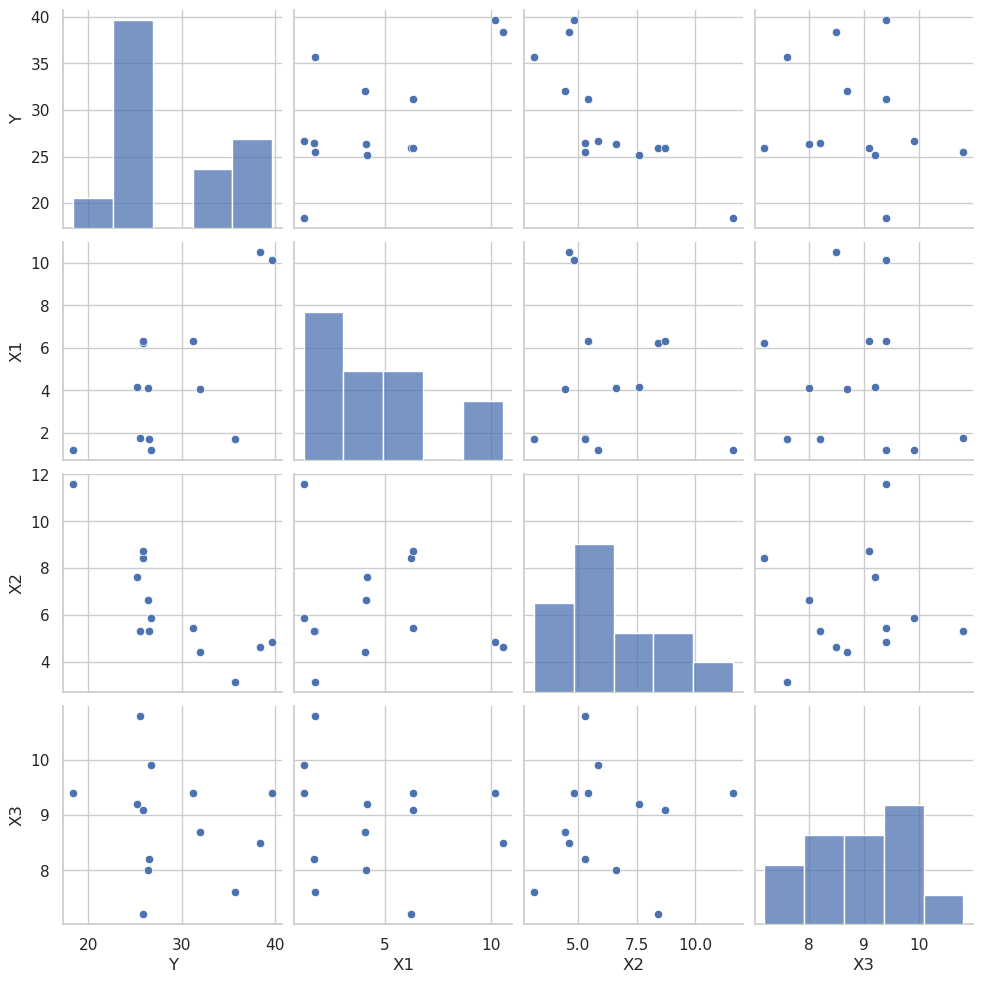

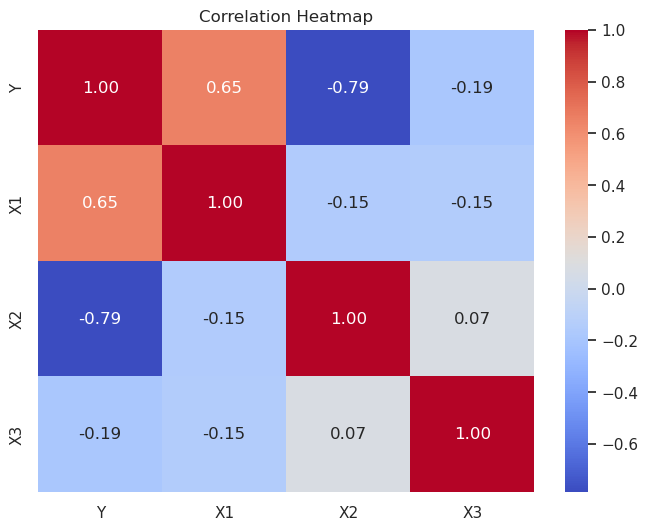

In [15]:

# Set Seaborn style
sns.set(style="whitegrid")

# Scatter plots for each X variable vs Y
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(["X1", "X2", "X3"]):
    sns.scatterplot(x=df[col], y=df["Y"], ax=axes[i])
    axes[i].set_title(f"Y vs {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Y")

plt.tight_layout()
plt.show()

# Pairplot to visualize pairwise relationships
sns.pairplot(df)
plt.show()

# Heatmap to check correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

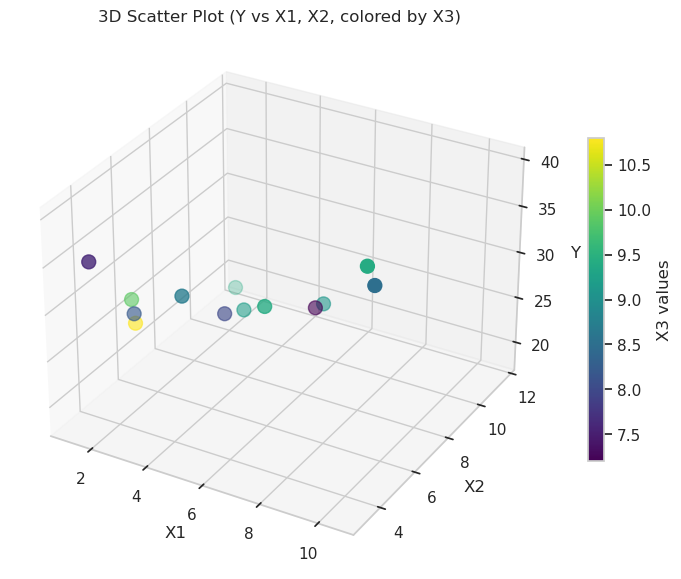

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot (Y vs X1, X2), with color mapped to X3
sc = ax.scatter(df["X1"], df["X2"], df["Y"], c=df["X3"], cmap='viridis', s=100)

# Labels
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("3D Scatter Plot (Y vs X1, X2, colored by X3)")

# Add color bar
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, aspect=20)
cbar.set_label("X3 values")

plt.show()

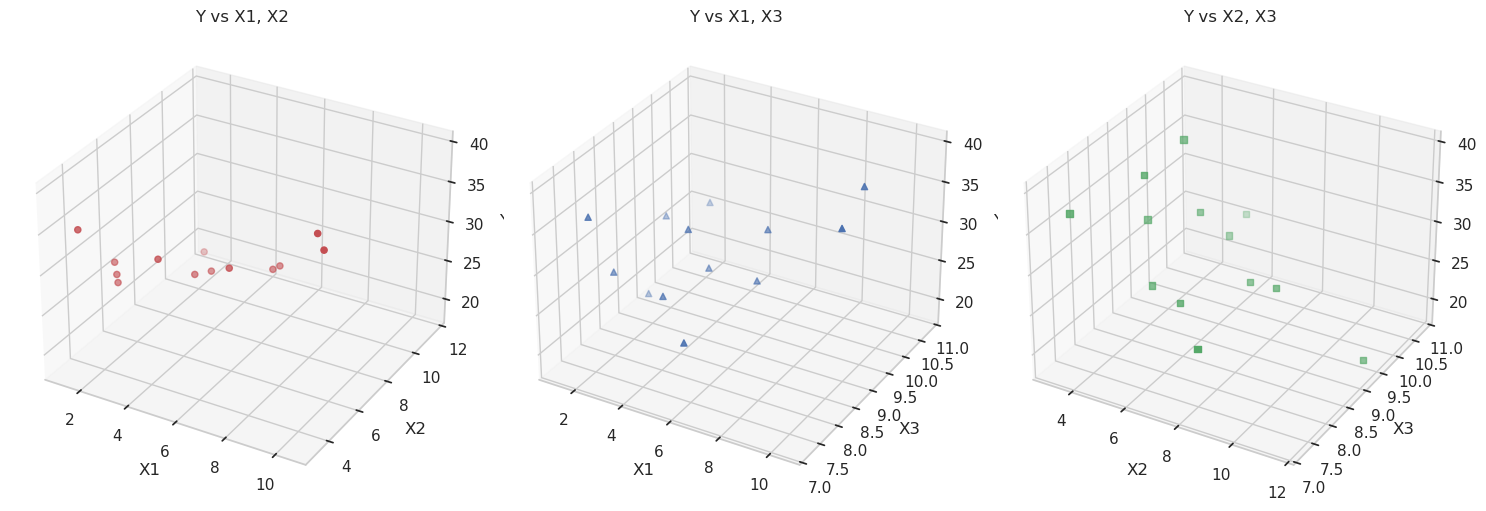

In [17]:
fig = plt.figure(figsize=(15, 5))

# Y vs X1, X2
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df["X1"], df["X2"], df["Y"], c='r', marker='o')
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_zlabel("Y")
ax1.set_title("Y vs X1, X2")

# Y vs X1, X3
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df["X1"], df["X3"], df["Y"], c='b', marker='^')
ax2.set_xlabel("X1")
ax2.set_ylabel("X3")
ax2.set_zlabel("Y")
ax2.set_title("Y vs X1, X3")

# Y vs X2, X3
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df["X2"], df["X3"], df["Y"], c='g', marker='s')
ax3.set_xlabel("X2")
ax3.set_ylabel("X3")
ax3.set_zlabel("Y")
ax3.set_title("Y vs X2, X3")

plt.tight_layout()
plt.show()


In [1]:
from sklearn.datasets import fetch_california_housing  # Import the fetch_california_housing function from sklearn.datasets to load the California Housing dataset.
import pandas as pd  # Import pandas for data manipulation and analysis.
import numpy as np  # Import numpy for numerical computing.

# Load the California Housing dataset using the fetch_california_housing function.
housing = fetch_california_housing()

# Convert the dataset's data into a pandas DataFrame, using the feature names as column headers.
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target variable 'MedHouseValue' to the DataFrame, using the dataset's target values.
housing_df['MedHouseValue'] = housing.target

# Display the first few rows of the DataFrame to get an overview of the dataset.
print(housing_df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [2]:
correlation_matrix = housing_df.corr()
print(correlation_matrix['MedHouseValue'])

MedInc           0.688075
HouseAge         0.105623
AveRooms         0.151948
AveBedrms       -0.046701
Population      -0.024650
AveOccup        -0.023737
Latitude        -0.144160
Longitude       -0.045967
MedHouseValue    1.000000
Name: MedHouseValue, dtype: float64


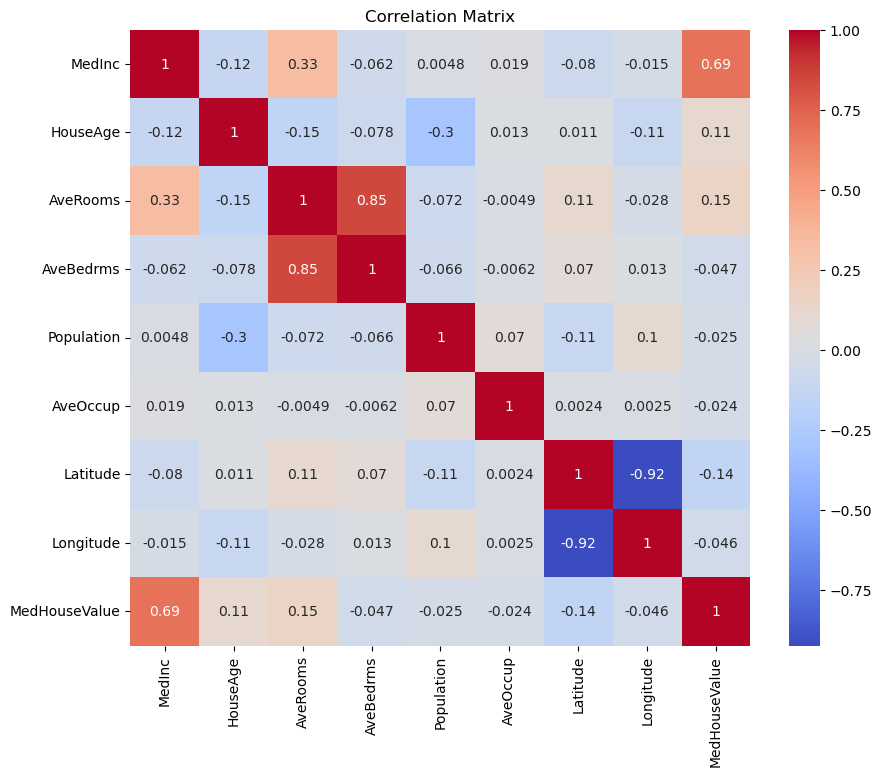

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'housing_df' is the DataFrame containing the data
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [4]:
selected_features = ['MedInc', 'AveRooms', 'AveOccup']
X = housing_df[selected_features]
y = housing_df['MedHouseValue']

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# Print the scaled data
print(X_scaled)

[[ 2.34476576  0.62855945 -0.04959654]
 [ 2.33223796  0.32704136 -0.09251223]
 [ 1.7826994   1.15562047 -0.02584253]
 ...
 [-1.14259331 -0.09031802 -0.0717345 ]
 [-1.05458292 -0.04021111 -0.09122515]
 [-0.78012947 -0.07044252 -0.04368215]]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# The 'LinearRegression' model is initialized and fitted to the training data.
model = LinearRegression()
model.fit(X_train, y_train)

# The model is used to predict the target variable for the test set.
y_pred = model.predict(X_test)


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.7006855912225248
R-squared: 0.4652924370503557


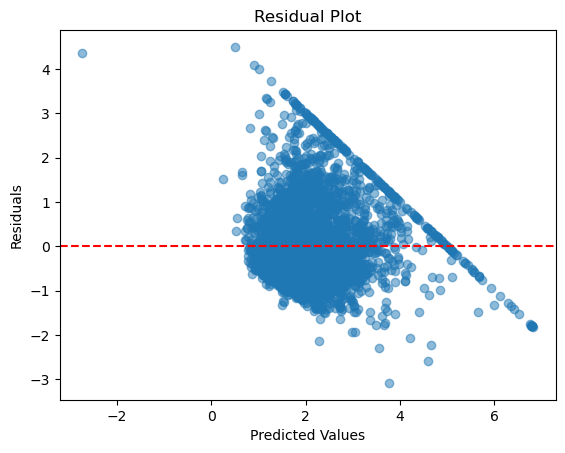

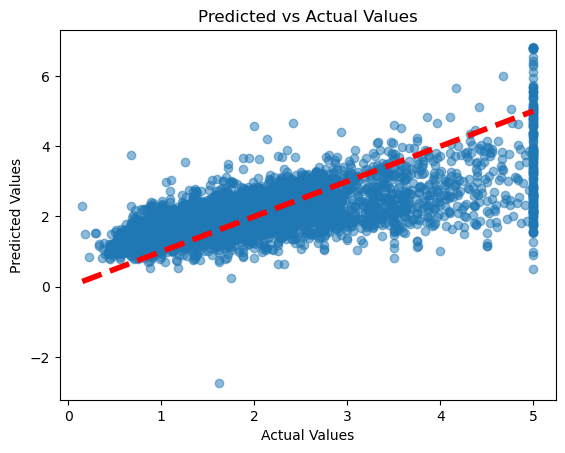

In [8]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Predicted vs Actual Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.show()

                            OLS Regression Results                            
Dep. Variable:          MedHouseValue   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     5173.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        07:48:10   Log-Likelihood:                -20354.
No. Observations:               16512   AIC:                         4.072e+04
Df Residuals:                   16508   BIC:                         4.075e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0679      0.006    320.074      0.0

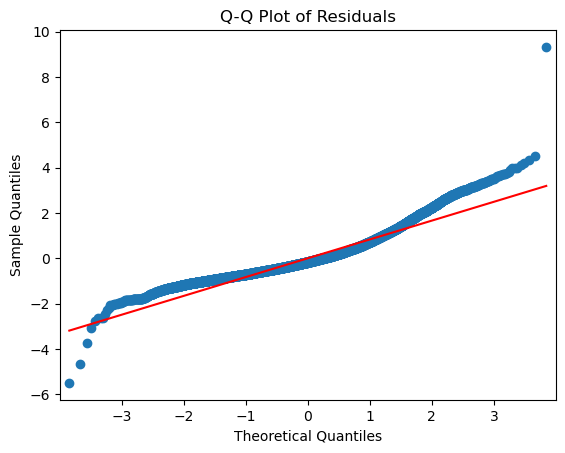

In [9]:
import statsmodels.api as sm

# Add a constant to the model
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Q-Q Plot for residuals
sm.qqplot(model_sm.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

    Feature       VIF
0    MedInc  1.120166
1  AveRooms  1.119797
2  AveOccup  1.000488


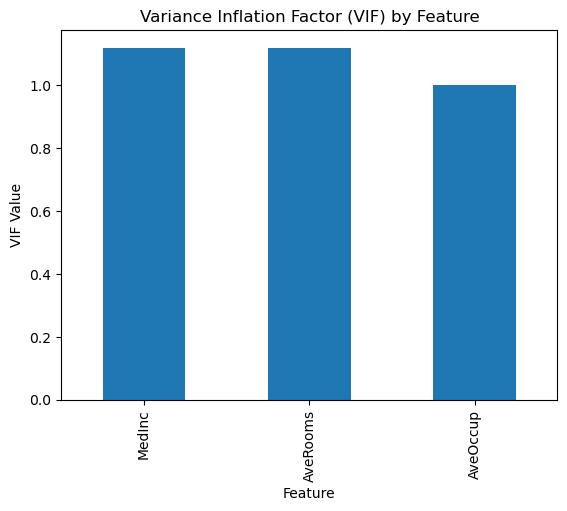

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = selected_features
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

# Bar Plot for VIF Values
vif_data.plot(kind='bar', x='Feature', y='VIF', legend=False)
plt.title('Variance Inflation Factor (VIF) by Feature')
plt.ylabel('VIF Value')
plt.show()


Cross-Validation Scores: [0.42854821 0.37096545 0.46910866 0.31191043 0.51269138]
Mean CV R^2: 0.41864482644003287


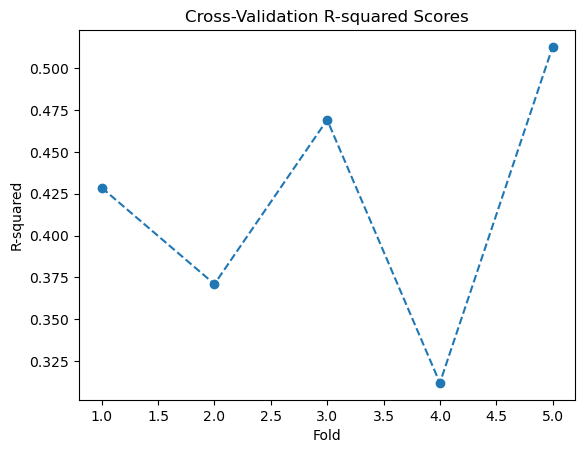

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("Cross-Validation Scores:", scores)
print("Mean CV R^2:", scores.mean())

# Line Plot for Cross-Validation Scores
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.show()

Selected Features: [ True  True  True]


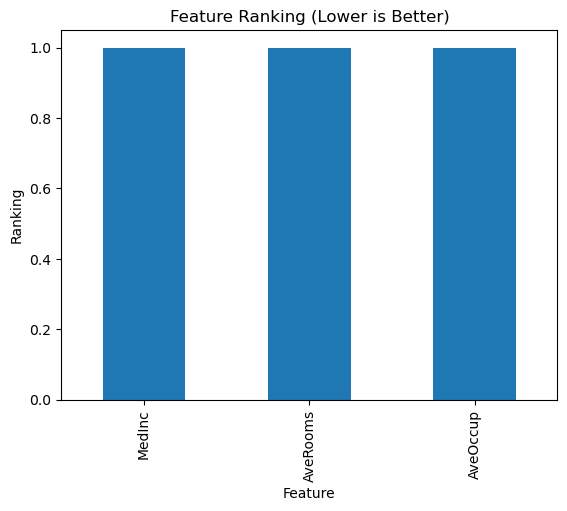

In [12]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X_scaled, y)
print("Selected Features:", rfe.support_)

# Bar Plot of Feature Rankings
feature_ranking = pd.DataFrame({
   'Feature': selected_features,
   'Ranking': rfe.ranking_
})
feature_ranking.sort_values(by='Ranking').plot(kind='bar', x='Feature', y='Ranking', legend=False)
plt.title('Feature Ranking (Lower is Better)')
plt.ylabel('Ranking')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Example data
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])  # Predictor variables
y = np.array([5, 7, 9, 11])  # Target variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)

Coefficients: [1. 1.]
Intercept: 2.0000000000000018
Predictions: [ 5.  7.  9. 11.]
